[The challenges of modeling churn](https://neilpatel.com/blog/modeling-churn/)

[Why churn analysis is valuable for companies](https://www.datascience.com/blog/what-is-a-churn-analysis-and-why-is-it-valuable-for-business)

[Git social](https://github.com/VinaySagar92/Git-Social)

[Azure revenue](https://www.forbes.com/sites/bobevans1/2018/10/29/1-microsoft-beats-amazon-in-12-month-cloud-revenue-26-7-billion-to-23-4-billion-ibm-third/#2c9e12912bf1)

[Why did Microsoft pay so much for GitHub](https://hbr.org/2018/06/why-microsoft-is-willing-to-pay-so-much-for-github)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

import helper as h


[Group each in BigQuery](https://stackoverflow.com/questions/22600299/understanding-resources-exceeded-during-query-execution-with-group-each-by-in)

In [2]:
df = pd.read_csv('results_2016_01_01_2016_06_01.csv')
df.head()

,actor,event_count,last_event,first_event
0,djtaylor,264,2016-06-01 19:41:53 UTC,2016-01-01 23:18:08 UTC
1,strarsis,530,2016-06-01 23:52:40 UTC,2016-01-01 00:20:39 UTC
2,silenteh,94,2016-05-12 21:05:13 UTC,2016-01-01 21:09:52 UTC
3,PlagueHO,2851,2016-06-01 08:58:35 UTC,2016-01-01 00:18:17 UTC
4,zjhzxhz,461,2016-06-01 11:53:58 UTC,2016-01-01 14:00:52 UTC


In [3]:
df = df[df.event_count > 1]
df['last_event'] = pd.to_datetime(df.last_event)
df['first_event'] = pd.to_datetime(df.first_event)
df['time_between_first_last_event'] = df.last_event - df.first_event
df.dtypes

actor                                     object
event_count                                int64
last_event                        datetime64[ns]
first_event                       datetime64[ns]
time_between_first_last_event    timedelta64[ns]
dtype: object

In [4]:
df.describe()

,event_count,time_between_first_last_event
count,3.049652e+06,3049652
mean,4.273135e+01,50 days 01:39:10.175534
std,2.545855e+03,53 days 01:37:02.667868
min,2.000000e+00,0 days 00:00:00
25%,3.000000e+00,0 days 01:58:16.750000
50%,9.000000e+00,28 days 10:56:55
75%,2.700000e+01,97 days 20:32:41.250000
max,3.954328e+06,152 days 23:59:57


/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


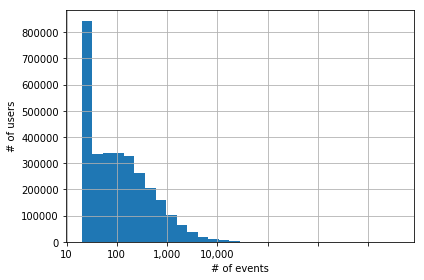

In [5]:
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(True)

df.event_count.apply(np.log10).hist(ax=ax, bins=30)
ax.set_xticklabels(['', '10', '100', '1,000', '10,000'])
ax.set_xlabel('# of events')
ax.set_ylabel('# of users')

fig.savefig('number_of_events_firstHalf2016.png')

Text(0, 0.5, '# of users')

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


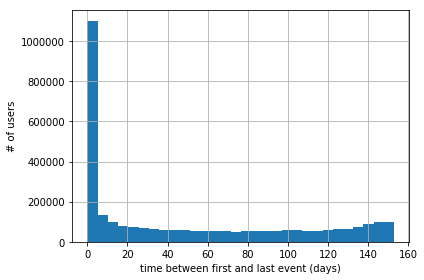

In [6]:
t = (df.time_between_first_last_event / pd.Timedelta(days = 1))

fig, ax = plt.subplots(1,1)
fig.set_tight_layout(True)
t.hist(ax=ax, bins=30)
ax.set_xlabel('time between first and last event (days)')
ax.set_ylabel('# of users')


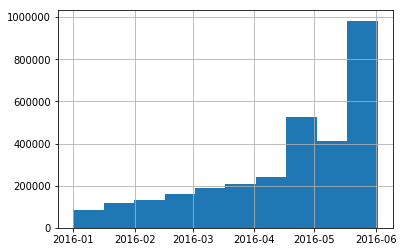

In [7]:
df.last_event.hist()

In [8]:
df['actor'] = df.actor.astype(str)
df.tail()

,actor,event_count,last_event,first_event,time_between_first_last_event
3699847,nick076,29,2016-06-01 13:46:22,2016-05-12 09:05:34,20 days 04:40:48
3699848,irqbank,29,2016-05-23 07:31:12,2016-05-15 13:14:22,7 days 18:16:50
3699849,fuyunfei,29,2016-05-26 15:53:01,2016-05-17 17:21:04,8 days 22:31:57
3699850,1988wj,29,2016-05-26 12:45:45,2016-05-25 10:40:11,1 days 02:05:34
3699851,Harikath,29,2016-05-26 19:41:10,2016-05-25 15:50:13,1 days 03:50:57


In [9]:
users = pd.read_csv('user_batch_5000_10000.csv', index_col=0)

In [10]:
users.head()

,login,followers_count,following_count,bio,blog,company,created_at,public_repos_count,public_gists_count,hireable,updated_at,event_count,last_event,first_event,time_between_first_last_event
000001a,000001a,0,0,NaN,NaN,NaN,2016-05-18 19:56:42+00:00,0,0,NaN,2016-07-20 08:24:12+00:00,2,2016-05-18 20:11:30,2016-05-18 20:01:08,0 days 00:10:22.000000000
016Nojr,016Nojr,1,0,NaN,NaN,NaN,2014-07-17 15:25:39+00:00,0,19,NaN,2019-01-13 17:32:41+00:00,5,2016-03-19 11:56:46,2016-01-20 12:13:02,58 days 23:43:44.000000000
0xmalloc,0xmalloc,50,12,Bio Bio Bio,http://weibo.com/zealotyin,是非成败转头空，青山依旧在，几度夕阳红;万丈红尘三杯酒，千秋大业一壶茶。,2013-01-03 08:43:32+00:00,19,0,True,2018-10-15 12:10:06+00:00,11,2016-05-03 02:41:51,2016-05-03 02:41:51,0 days 00:00:00.000000000
13MaxG,13MaxG,1,0,NaN,http://1618.pl,NaN,2011-06-25 15:04:00+00:00,6,0,True,2018-11-24 18:54:54+00:00,11,2016-02-11 14:13:45,2016-02-06 10:19:33,5 days 03:54:12.000000000
18259064372,18259064372,0,0,NaN,NaN,NaN,2015-10-19 05:31:05+00:00,5,0,NaN,2018-04-10 03:20:35+00:00,3,2016-05-09 04:16:45,2016-03-22 01:14:25,48 days 03:02:20.000000000


In [11]:
users['blog'] = users.blog.apply(lambda x: 1 if x != '' else 0)
users['company'] = users.company.apply(lambda x: 1 if x != '' else 0)
users['bio'] = users.bio.apply(lambda x: 1 if x != '' else 0)

In [12]:
users.head()

,login,followers_count,following_count,bio,blog,company,created_at,public_repos_count,public_gists_count,hireable,updated_at,event_count,last_event,first_event,time_between_first_last_event
000001a,000001a,0,0,1,1,1,2016-05-18 19:56:42+00:00,0,0,NaN,2016-07-20 08:24:12+00:00,2,2016-05-18 20:11:30,2016-05-18 20:01:08,0 days 00:10:22.000000000
016Nojr,016Nojr,1,0,1,1,1,2014-07-17 15:25:39+00:00,0,19,NaN,2019-01-13 17:32:41+00:00,5,2016-03-19 11:56:46,2016-01-20 12:13:02,58 days 23:43:44.000000000
0xmalloc,0xmalloc,50,12,1,1,1,2013-01-03 08:43:32+00:00,19,0,True,2018-10-15 12:10:06+00:00,11,2016-05-03 02:41:51,2016-05-03 02:41:51,0 days 00:00:00.000000000
13MaxG,13MaxG,1,0,1,1,1,2011-06-25 15:04:00+00:00,6,0,True,2018-11-24 18:54:54+00:00,11,2016-02-11 14:13:45,2016-02-06 10:19:33,5 days 03:54:12.000000000
18259064372,18259064372,0,0,1,1,1,2015-10-19 05:31:05+00:00,5,0,NaN,2018-04-10 03:20:35+00:00,3,2016-05-09 04:16:45,2016-03-22 01:14:25,48 days 03:02:20.000000000


In [13]:
#fig, ax = plt.plot(dd.followers_count, dd.last_event)
users[['followers_count', 'last_event', 'event_count', 'public_repos_count']].corr()

,followers_count,event_count,public_repos_count
followers_count,1.000000,0.166076,0.275966
event_count,0.166076,1.000000,0.148303
public_repos_count,0.275966,0.148303,1.000000


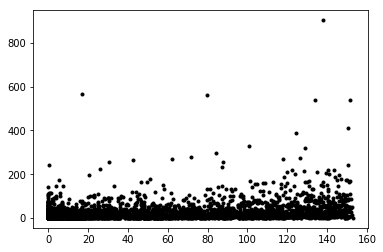

In [14]:
fig, ax = plt.subplots(1,1)

t = users.time_between_first_last_event / pd.Timedelta(days = 1)

ax.plot(t, users.public_repos_count, 'k.')

In [15]:
'''fig, ax = plt.subplots(1,1)

time_from_last_event = (pd.to_datetime('06/01/2016') - users.last_event) / pd.Timedelta(days = 1)

ax.semilogy(time_from_last_event, users.public_repos_count, 'k.')'''

"fig, ax = plt.subplots(1,1)\n\ntime_from_last_event = (pd.to_datetime('06/01/2016') - users.last_event) / pd.Timedelta(days = 1)\n\nax.semilogy(time_from_last_event, users.public_repos_count, 'k.')"

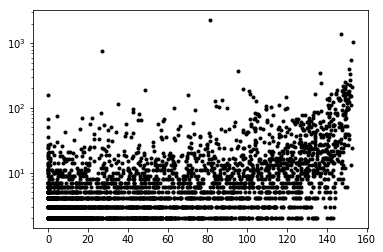

In [16]:
fig, ax = plt.subplots(1,1)

ax.semilogy(t, users.event_count, 'k.')

fig.savefig('figure.png')

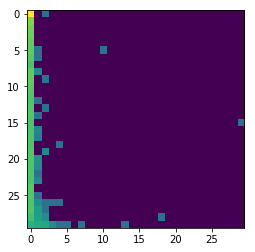

In [17]:
counts, xedge, yedge = plt.histogram2d(t, users.event_count, bins=30)

plt.imshow(np.log10(counts+0.01))#, xedge=xedge, yedge=yedge)

In [18]:
second_half = pd.read_csv('results_2016_06_02_2016_11_01_01.csv')
second_half.head()

,actor,event_count,last_event,first_event
0,exmatrikulator,95,2016-11-01 18:51:49 UTC,2016-06-02 18:25:12 UTC
1,kofikofi123,106,2016-10-09 16:56:59 UTC,2016-06-02 02:22:51 UTC
2,Vivian5T,111,2016-09-27 00:59:14 UTC,2016-06-02 00:52:39 UTC
3,madmax9242,96,2016-10-26 23:31:17 UTC,2016-06-02 17:02:19 UTC
4,chenpaulp,66,2016-07-01 16:30:52 UTC,2016-06-02 01:01:45 UTC


In [19]:
both_halves = users.merge(second_half, how='left', left_on='login', right_on='actor', suffixes=['_first', '_second'])
both_halves.head()

,login,followers_count,following_count,bio,blog,company,created_at,public_repos_count,public_gists_count,hireable,updated_at,event_count_first,last_event_first,first_event_first,time_between_first_last_event,actor,event_count_second,last_event_second,first_event_second
0,000001a,0,0,1,1,1,2016-05-18 19:56:42+00:00,0,0,NaN,2016-07-20 08:24:12+00:00,2,2016-05-18 20:11:30,2016-05-18 20:01:08,0 days 00:10:22.000000000,NaN,NaN,NaN,NaN
1,016Nojr,1,0,1,1,1,2014-07-17 15:25:39+00:00,0,19,NaN,2019-01-13 17:32:41+00:00,5,2016-03-19 11:56:46,2016-01-20 12:13:02,58 days 23:43:44.000000000,016Nojr,77.0,2016-10-11 19:28:02 UTC,2016-06-15 17:48:31 UTC
2,0xmalloc,50,12,1,1,1,2013-01-03 08:43:32+00:00,19,0,True,2018-10-15 12:10:06+00:00,11,2016-05-03 02:41:51,2016-05-03 02:41:51,0 days 00:00:00.000000000,0xmalloc,3.0,2016-08-23 04:24:09 UTC,2016-06-05 08:36:49 UTC
3,13MaxG,1,0,1,1,1,2011-06-25 15:04:00+00:00,6,0,True,2018-11-24 18:54:54+00:00,11,2016-02-11 14:13:45,2016-02-06 10:19:33,5 days 03:54:12.000000000,13MaxG,3.0,2016-07-12 19:47:32 UTC,2016-06-17 19:33:25 UTC
4,18259064372,0,0,1,1,1,2015-10-19 05:31:05+00:00,5,0,NaN,2018-04-10 03:20:35+00:00,3,2016-05-09 04:16:45,2016-03-22 01:14:25,48 days 03:02:20.000000000,NaN,NaN,NaN,NaN


In [20]:
both_halves['event_count_second'] = both_halves.event_count_second.fillna(0)

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


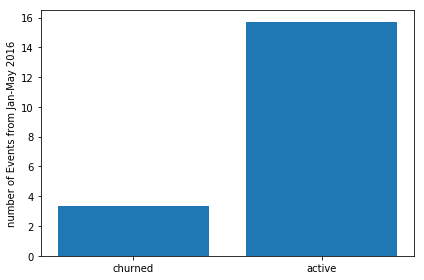

In [22]:
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(True)

ax.bar([1, 2], [both_halves[both_halves.event_count_second == 0].event_count_first.mean(),
       both_halves[both_halves.event_count_second > 0].event_count_first.mean()])
ax.set_xticks([1, 2])
ax.set_xticklabels(['churned', 'active'])
ax.set_ylabel('number of Events from Jan-May 2016')

fig.savefig('number_of_events_churnedVSactive.png')

In [23]:
np.sum(both_halves.event_count_second == 0), np.std(both_halves.event_count_second == 0)

(1829, 0.48583695147729206)

In [24]:
np.sum(both_halves.event_count_second > 0), np.std(both_halves.event_count_second > 0)

(2961, 0.48583695147729217)

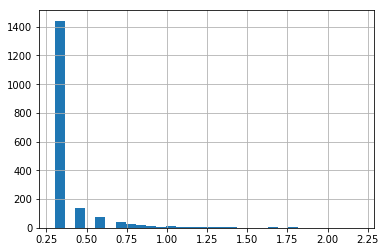

In [25]:
both_halves[both_halves.event_count_second == 0].event_count_first.apply(np.log10).hist(bins=30)

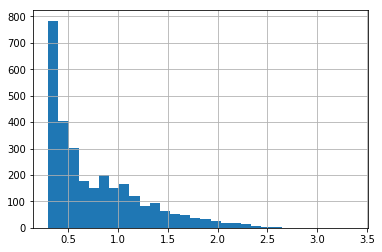

In [26]:
both_halves[both_halves.event_count_second > 0].event_count_first.apply(np.log10).hist(bins=30)

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


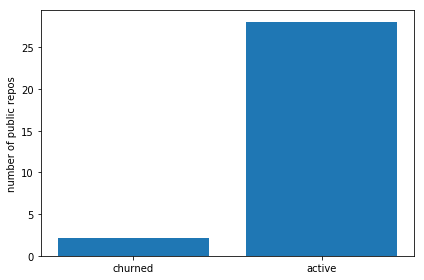

In [27]:
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(True)

ax.bar([1, 2], [both_halves[both_halves.event_count_second == 0].public_repos_count.mean(),
       both_halves[both_halves.event_count_second > 0].public_repos_count.mean()])
ax.set_xticks([1, 2])
ax.set_xticklabels(['churned', 'active'])
ax.set_ylabel('number of public repos')

fig.savefig('number_of_repos_churnedVSactive.png')

In [28]:
both_halves[both_halves.event_count_second > 0].head()

,login,followers_count,following_count,bio,blog,company,created_at,public_repos_count,public_gists_count,hireable,updated_at,event_count_first,last_event_first,first_event_first,time_between_first_last_event,actor,event_count_second,last_event_second,first_event_second
1,016Nojr,1,0,1,1,1,2014-07-17 15:25:39+00:00,0,19,NaN,2019-01-13 17:32:41+00:00,5,2016-03-19 11:56:46,2016-01-20 12:13:02,58 days 23:43:44.000000000,016Nojr,77.0,2016-10-11 19:28:02 UTC,2016-06-15 17:48:31 UTC
2,0xmalloc,50,12,1,1,1,2013-01-03 08:43:32+00:00,19,0,True,2018-10-15 12:10:06+00:00,11,2016-05-03 02:41:51,2016-05-03 02:41:51,0 days 00:00:00.000000000,0xmalloc,3.0,2016-08-23 04:24:09 UTC,2016-06-05 08:36:49 UTC
3,13MaxG,1,0,1,1,1,2011-06-25 15:04:00+00:00,6,0,True,2018-11-24 18:54:54+00:00,11,2016-02-11 14:13:45,2016-02-06 10:19:33,5 days 03:54:12.000000000,13MaxG,3.0,2016-07-12 19:47:32 UTC,2016-06-17 19:33:25 UTC
5,1u,10,5,1,1,1,2013-04-28 13:43:06+00:00,5,0,NaN,2019-01-10 23:40:59+00:00,124,2016-06-01 23:14:05,2016-01-02 17:37:40,151 days 05:36:25.000000000,1u,292.0,2016-11-01 17:30:54 UTC,2016-06-02 13:27:44 UTC
6,1xiaocainiao,4,50,1,1,1,2014-03-26 04:30:09+00:00,78,1,NaN,2018-12-17 13:47:01+00:00,5,2016-05-19 08:32:51,2016-01-04 03:54:11,136 days 04:38:40.000000000,1xiaocainiao,54.0,2016-11-01 01:37:33 UTC,2016-06-04 02:22:56 UTC


/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


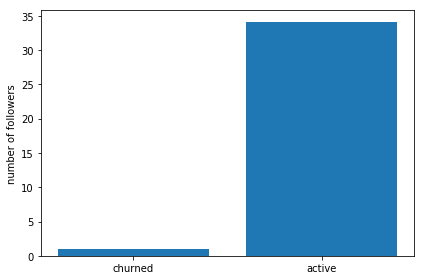

In [29]:
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(True)

ax.bar([1, 2], [both_halves[both_halves.event_count_second == 0].followers_count.mean(),
       both_halves[both_halves.event_count_second > 0].followers_count.mean()])
ax.set_xticks([1, 2])
ax.set_xticklabels(['churned', 'active'])
ax.set_ylabel('number of followers')

fig.savefig('number_of_followers_churnedVSactive.png')

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


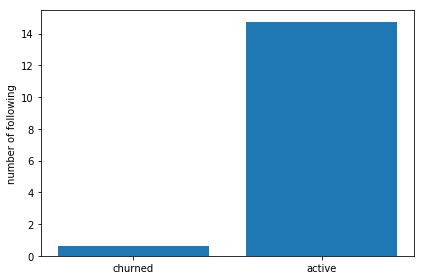

In [30]:
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(True)

ax.bar([1, 2], [both_halves[both_halves.event_count_second == 0].following_count.mean(),
       both_halves[both_halves.event_count_second > 0].following_count.mean()])
ax.set_xticks([1, 2])
ax.set_xticklabels(['churned', 'active'])
ax.set_ylabel('number of following')

fig.savefig('number_of_following_churnedVSactive.png')

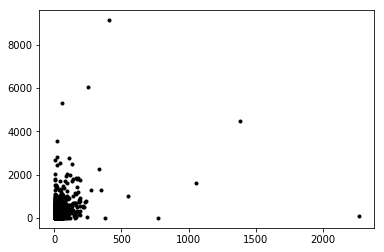

In [31]:
plt.plot(both_halves.event_count_first,
        both_halves.event_count_second, 'k.')

In [32]:
both_halves.corr()

,followers_count,following_count,bio,blog,company,public_repos_count,public_gists_count,event_count_first,event_count_second
followers_count,1.000000,0.152532,NaN,NaN,NaN,0.275966,0.188902,0.166076,0.238887
following_count,0.152532,1.000000,NaN,NaN,NaN,0.239635,0.137862,0.033805,0.115977
bio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
public_repos_count,0.275966,0.239635,NaN,NaN,NaN,1.000000,0.411730,0.148303,0.403411
public_gists_count,0.188902,0.137862,NaN,NaN,NaN,0.411730,1.000000,0.098140,0.280647
event_count_first,0.166076,0.033805,NaN,NaN,NaN,0.148303,0.098140,1.000000,0.368637
event_count_second,0.238887,0.115977,NaN,NaN,NaN,0.403411,0.280647,0.368637,1.000000


In [ ]:
#numeric_data = df.select(numeric_features).toPandas()
axs = pd.scatter_matrix(both_halves, figsize=(8, 8));
n = len(both_halves.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())